# PROJECT TITLE: CRIME TRENDS IN CITIES 🕵️‍♂️📈 🚔🔫

In [1]:
print("Hello World")

Hello World


# 🛠️Importing the libraries.....

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import folium
from folium.plugins import MarkerCluster

# 📥Read CSV file

In [3]:
data=pd.read_csv("Crime_Data_from_2020_to_Present.csv");

In [4]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03-01-2020 00:00,03-01-2020 00:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02-09-2020 00:00,02-08-2020 00:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11-11-2020 00:00,11-04-2020 00:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05-10-2023 00:00,03-10-2020 00:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09-09-2020 00:00,09-09-2020 00:00,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005198 entries, 0 to 1005197
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005198 non-null  int64  
 1   Date Rptd       1005198 non-null  object 
 2   DATE OCC        1005198 non-null  object 
 3   TIME OCC        1005198 non-null  int64  
 4   AREA            1005198 non-null  int64  
 5   AREA NAME       1005198 non-null  object 
 6   Rpt Dist No     1005198 non-null  int64  
 7   Part 1-2        1005198 non-null  int64  
 8   Crm Cd          1005198 non-null  int64  
 9   Crm Cd Desc     1005198 non-null  object 
 10  Mocodes         853438 non-null   object 
 11  Vict Age        1005198 non-null  int64  
 12  Vict Sex        860416 non-null   object 
 13  Vict Descent    860404 non-null   object 
 14  Premis Cd       1005182 non-null  float64
 15  Premis Desc     1004610 non-null  object 
 16  Weapon Used Cd  327280 non-null   fl

# 🧮🧹Data Preprocessing and cleaning

In [6]:
data.rename(columns={
    'Crm Cd 1': 'Primary Crime Code',
    'Crm Cd 2': 'Secondary Crime Code',
    'Crm Cd 3': 'Third Crime Code',
    'Crm Cd 4': 'Fourth Crime Code',
    'Crm Cd Desc': 'Crime Description',
    'DATE OCC': 'Date',
    'TIME OCC': 'Time',
    # 'AREA NAME': 'Area',
    'LAT': 'Latitude',
    'LON': 'Longitude'
}, inplace=True)


In [7]:
# Drop the integer-based AREA column
if 'AREA' in data.columns:
    data.drop(columns=['AREA'], inplace=True)

In [8]:
# Drop irrelevant or redundant columns
columns_to_drop = [
    'Cross Street',
    'Location',
    'Premis Code',
    'Weapon Used Cd',
    'Status',
    'Mocodes',
    'Rpt Dist No',
    'DR_NO'
]

# Drop only if present (to avoid errors)
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)

In [9]:
# Count how many crime codes are non-null in each row
data['Total Offenses'] = data[['Primary Crime Code', 'Secondary Crime Code', 'Third Crime Code', 'Fourth Crime Code']].notnull().sum(axis=1)
# data['Total Offenses'] = data[['Primary Crime Code', 'Secondary Crime Code', 'Third Crime Code', 'Fourth Crime Code']].count(axis=1)

In [10]:
data.head()

,Date Rptd,Date,Time,AREA NAME,Part 1-2,Crm Cd,Crime Description,Vict Age,Vict Sex,Vict Descent,...,Weapon Desc,Status Desc,Primary Crime Code,Secondary Crime Code,Third Crime Code,Fourth Crime Code,LOCATION,Latitude,Longitude,Total Offenses
0,03-01-2020 00:00,03-01-2020 00:00,2130,Wilshire,1,510,VEHICLE - STOLEN,0,M,O,...,NaN,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,34.0375,-118.3506,2
1,02-09-2020 00:00,02-08-2020 00:00,1800,Central,1,330,BURGLARY FROM VEHICLE,47,M,O,...,NaN,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,34.0444,-118.2628,2
2,11-11-2020 00:00,11-04-2020 00:00,1700,Southwest,1,480,BIKE - STOLEN,19,X,X,...,NaN,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,34.0210,-118.3002,1
3,05-10-2023 00:00,03-10-2020 00:00,2037,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,...,NaN,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,1
4,09-09-2020 00:00,09-09-2020 00:00,630,Hollenbeck,1,510,VEHICLE - STOLEN,0,NaN,NaN,...,NaN,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,34.0820,-118.2130,1


In [11]:
# Count how many incidents have 1, 2, 3, or 4 total offenses
offense_counts = data['Total Offenses'].value_counts().sort_index()
print(offense_counts)

Total Offenses
1    936050
2     66834
3      2250
4        64
Name: count, dtype: int64


In [12]:
# Extract hour from TIME OCC column
data['Hour'] = data['Time'].astype(str).str.zfill(4).str[:2].astype(int)

In [13]:
# Convert DATE OCC to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract year and month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.day_name()
data['Vict Sex'] = data['Vict Sex'].replace('H', 'Unknown')

In [14]:
# Check if coordinates are valid
data['Valid Location'] = data[['Latitude', 'Latitude']].notnull().all(axis=1)

In [15]:
columns_to_drop = [
    'Date Rptd',
    'Crm Cd',
    'Vict Descent',
    'Premis Cd',
    'Premis Desc',
    'Status Desc',
    'LOCATION',
    'Valid Location',
    # Remove the duplicated Latitude column (keep only one)
]

# Now drop the others
data.drop(columns=columns_to_drop, inplace=True)


In [16]:
# 1. Drop rows with missing 'Date', 'Year', 'Month', or 'DayOfWeek' (time-based analysis needs them)
data_clean = data.dropna(subset=['Date', 'Year', 'Month', 'DayOfWeek','Hour', 'Vict Age', 
                                 'Vict Sex', 'Weapon Desc', 'AREA NAME', 'Total Offenses'])

# 2. Drop rows with missing 'Primary Crime Code'
data = data.dropna(subset=['Primary Crime Code'])

# 3. Drop extra crime code columns (used earlier for Total Offenses)
data = data.drop(columns=['Secondary Crime Code', 'Third Crime Code', 'Fourth Crime Code'])

# 4. Fill 'Vict Sex' with 'Unknown' or leave as is depending on future use
data['Vict Sex'] = data['Vict Sex'].fillna('Unknown')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005187 entries, 0 to 1005197
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Date                412622 non-null   datetime64[ns]
 1   Time                1005187 non-null  int64         
 2   AREA NAME           1005187 non-null  object        
 3   Part 1-2            1005187 non-null  int64         
 4   Crime Description   1005187 non-null  object        
 5   Vict Age            1005187 non-null  int64         
 6   Vict Sex            1005187 non-null  object        
 7   Weapon Desc         327277 non-null   object        
 8   Primary Crime Code  1005187 non-null  float64       
 9   Latitude            1005187 non-null  float64       
 10  Longitude           1005187 non-null  float64       
 11  Total Offenses      1005187 non-null  int64         
 12  Hour                1005187 non-null  int64         
 13  Year             

In [18]:
data.head()

,Date,Time,AREA NAME,Part 1-2,Crime Description,Vict Age,Vict Sex,Weapon Desc,Primary Crime Code,Latitude,Longitude,Total Offenses,Hour,Year,Month,DayOfWeek
0,2020-03-01,2130,Wilshire,1,VEHICLE - STOLEN,0,M,NaN,510.0,34.0375,-118.3506,2,21,2020.0,3.0,Sunday
1,2020-02-08,1800,Central,1,BURGLARY FROM VEHICLE,47,M,NaN,330.0,34.0444,-118.2628,2,18,2020.0,2.0,Saturday
2,2020-11-04,1700,Southwest,1,BIKE - STOLEN,19,X,NaN,480.0,34.0210,-118.3002,1,17,2020.0,11.0,Wednesday
3,2020-03-10,2037,Van Nuys,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,NaN,343.0,34.1576,-118.4387,1,20,2020.0,3.0,Tuesday
4,2020-09-09,630,Hollenbeck,1,VEHICLE - STOLEN,0,Unknown,NaN,510.0,34.0820,-118.2130,1,6,2020.0,9.0,Wednesday


# 📋Summary of Dataset

In [19]:
# Always good to start EDA with a quick summary.
print("Shape of Data:", data.shape)
print("\nColumns:\n", data.columns)
print("\nInfo:\n")
print(data.info())
print("\nMissing Values:\n")
print(data.isnull().sum())

Shape of Data: (1005187, 16)

Columns:
 Index(['Date', 'Time', 'AREA NAME', 'Part 1-2', 'Crime Description',
       'Vict Age', 'Vict Sex', 'Weapon Desc', 'Primary Crime Code', 'Latitude',
       'Longitude', 'Total Offenses', 'Hour', 'Year', 'Month', 'DayOfWeek'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
Index: 1005187 entries, 0 to 1005197
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Date                412622 non-null   datetime64[ns]
 1   Time                1005187 non-null  int64         
 2   AREA NAME           1005187 non-null  object        
 3   Part 1-2            1005187 non-null  int64         
 4   Crime Description   1005187 non-null  object        
 5   Vict Age            1005187 non-null  int64         
 6   Vict Sex            1005187 non-null  object        
 7   Weapon Desc         327277 non-null   object        
 8   Primary Cri

# 📚Statistical Insights

In [20]:
# Correlation matrix between numerical columns
correlation = data_clean[['Hour', 'Vict Age', 'Total Offenses']].corr()

print("🔗 Correlation Matrix (Numeric Columns):")
print(correlation)
print("\n")


🔗 Correlation Matrix (Numeric Columns):
                    Hour  Vict Age  Total Offenses
Hour            1.000000  0.007213       -0.014825
Vict Age        0.007213  1.000000       -0.075476
Total Offenses -0.014825 -0.075476        1.000000




In [21]:
#  Average Age of Victims by Area
print("📍 Average Age of Victims by Area:")
print(data_clean.groupby('AREA NAME')['Vict Age'].mean().sort_values(ascending=False))
print("\n")



📍 Average Age of Victims by Area:
AREA NAME
West LA        36.418345
Topanga        36.200547
Van Nuys       35.777200
Wilshire       35.629738
Southwest      35.572366
Pacific        35.494157
West Valley    35.305894
Central        35.259616
Foothill       34.952879
Devonshire     34.598550
Olympic        34.281983
Harbor         34.278950
Northeast      34.148781
N Hollywood    34.098293
Hollenbeck     34.006642
Rampart        33.989093
Southeast      33.620738
77th Street    33.607205
Newton         33.562716
Mission        33.476646
Hollywood      31.895945
Name: Vict Age, dtype: float64




In [22]:
# Crime Count by Hour and Gender
print("📅 Crime Count by Hour and Gender:")
print(data_clean.groupby(['Hour', 'Vict Sex']).size().unstack(fill_value=0))
print("\n")


📅 Crime Count by Hour and Gender:
Vict Sex     F     M  Unknown     X
Hour                               
0         6691  6428        7   750
1         5248  5803        8   696
2         4374  4913        5   685
3         3418  3676        2   582
4         2599  2950        1   570
5         2189  2570        2   430
6         2657  2751        2   363
7         3717  3684        0   395
8         5344  4949        0   497
9         5396  5389        6   601
10        6504  6498        3   683
11        6908  7020        8   776
12        8938  8264        8   893
13        6941  7598        3   833
14        7184  7953        3   918
15        7845  8571        9   970
16        7679  8552        5  1015
17        7999  8880        6  1163
18        8024  8761        1  1166
19        7808  8843        5  1125
20        8468  9122        7  1210
21        8169  8991        6  1107
22        7956  8520        4  1011
23        7340  7758        4   893




In [23]:
print("🗡️ Average Victim Age by Weapon Type:")
print(data_clean.groupby('Weapon Desc')['Vict Age'].mean().sort_values(ascending=False).head(10))
print("\n")

🗡️ Average Victim Age by Weapon Type:
Weapon Desc
MARTIAL ARTS WEAPONS               46.714286
UZI SEMIAUTOMATIC ASSAULT RIFLE    46.100000
CLEAVER                            42.333333
STICK                              40.909293
SWORD                              40.782609
STRAIGHT RAZOR                     40.368421
SYRINGE                            39.909091
SCALDING LIQUID                    39.227586
PIPE/METAL PIPE                    38.937627
ICE PICK                           38.768116
Name: Vict Age, dtype: float64




In [24]:
# Most Dangerous Areas (based on highest average offenses)
dangerous_areas = data_clean.groupby('AREA NAME')['Total Offenses'].mean().sort_values(ascending=False)
print("💥 Most Dangerous Areas (by Avg. Offenses):")
print(dangerous_areas.head(10))
print("\n")

💥 Most Dangerous Areas (by Avg. Offenses):
AREA NAME
Mission        1.199665
Foothill       1.191051
Hollywood      1.170046
Northeast      1.170036
Van Nuys       1.166741
Olympic        1.165402
Hollenbeck     1.165074
West Valley    1.163247
Topanga        1.159544
Devonshire     1.157794
Name: Total Offenses, dtype: float64




In [25]:
# Gender-wise average age of victims
gender_age_stats = data_clean.groupby('Vict Sex')['Vict Age'].mean()
print("🧑‍🤝‍🧑 Average Victim Age by Gender:")
print(gender_age_stats)
print("\n")

🧑‍🤝‍🧑 Average Victim Age by Gender:
Vict Sex
F          35.654328
M          37.071053
Unknown    13.352381
X           3.521777
Name: Vict Age, dtype: float64




In [26]:
# Common crime hours per area
common_hour_by_area = data_clean.groupby('AREA NAME')['Hour'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print("⏰ Most Common Crime Hour per Area:")
print(common_hour_by_area.head(10))
print("\n")


⏰ Most Common Crime Hour per Area:
AREA NAME
77th Street    20
Central        12
Devonshire     12
Foothill       20
Harbor         21
Hollenbeck     20
Hollywood      22
Mission        22
N Hollywood    12
Newton         17
Name: Hour, dtype: int64




In [27]:
# Most frequent weapon per hour
weapon_by_hour = data_clean.groupby('Hour')['Weapon Desc'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print("🔪 Most Common Weapon by Hour:")
print(weapon_by_hour)
print("\n")



🔪 Most Common Weapon by Hour:
Hour
0     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
1     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
2     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
3     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
4     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
5     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
6     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
7     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
8     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
9     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
10    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
11    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
12    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
13    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
14    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
15    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
16    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
17    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
18    STRON

In [28]:
# Crimes by Gender and Weapon
gender_weapon = data_clean.groupby(['Vict Sex', 'Weapon Desc']).size().unstack(fill_value=0)
print("👫 Weapon Usage by Victim Gender:")
print(gender_weapon.head(10))
print("\n")



👫 Weapon Usage by Victim Gender:
Weapon Desc  AIR PISTOL/REVOLVER/RIFLE/BB GUN  ANTIQUE FIREARM  \
Vict Sex                                                         
F                                         557                2   
M                                        1236                5   
Unknown                                     0                0   
X                                          71                2   

Weapon Desc  ASSAULT WEAPON/UZI/AK47/ETC  AUTOMATIC WEAPON/SUB-MACHINE GUN  \
Vict Sex                                                                     
F                                     15                                 7   
M                                     56                                19   
Unknown                                0                                 0   
X                                      6                                 2   

Weapon Desc  AXE  BELT FLAILING INSTRUMENT/CHAIN  BLACKJACK  BLUNT INSTRUMENT  \
Vict Sex            

In [29]:
# Ensure month numbers are integers and non-null
data['Month'] = data['Month'].astype('Int64')  # Nullable integer

# Convert month number to name
data['Month_Name'] = data['Month'].apply(lambda x: calendar.month_name[int(x)] if pd.notnull(x) else x)

# Define ordered list of month names (1-12)
month_order = list(calendar.month_name)[1:]  # Skips empty '' at index 0

# Convert Month_Name to a categorical column with proper order
data['Month_Name'] = pd.Categorical(data['Month_Name'], categories=month_order, ordered=True)

# 📊 Monthly crime count per area
monthly_area_crime = data.groupby(['Month_Name', 'AREA NAME']).size().unstack(fill_value=0)

# Sort rows by month order
monthly_area_crime = monthly_area_crime.sort_index()

# 🖨️ Display first 10 rows
print("📅 Monthly Crime Frequency per Area:")
print(monthly_area_crime.head(10))


C:\Users\hp\AppData\Local\Temp\ipykernel_25624\1510784162.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_area_crime = data.groupby(['Month_Name', 'AREA NAME']).size().unstack(fill_value=0)


📅 Monthly Crime Frequency per Area:
AREA NAME   77th Street  Central  Devonshire  Foothill  Harbor  Hollenbeck  \
Month_Name                                                                   
January            2317     2465        1538      1219    1577        1409   
February           2387     2542        1620      1292    1477        1380   
March              2264     2302        1520      1180    1510        1311   
April              2294     2155        1423      1222    1514        1157   
May                2278     2113        1390      1184    1380        1271   
June               2111     2240        1428      1175    1323        1204   
July               2160     2388        1298      1157    1526        1296   
August             2046     2487        1382      1055    1309        1250   
September          2068     2285        1325      1091    1423        1230   
October            2208     2346        1340      1112    1459        1354   

AREA NAME   Hollywood  Miss

In [30]:
# Most frequent crime type per gender
top_crime_gender = data_clean.groupby('Vict Sex')['Crime Description'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print("📖 Most Common Crime Type by Gender:")
print(top_crime_gender)
print("\n")

📖 Most Common Crime Type by Gender:
Vict Sex
F                       INTIMATE PARTNER - SIMPLE ASSAULT
M                                BATTERY - SIMPLE ASSAULT
Unknown    ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
X                                                 ROBBERY
Name: Crime Description, dtype: object




# 🎨Visualization

# 1. Crime Count by Area 📊

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\1335224681.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




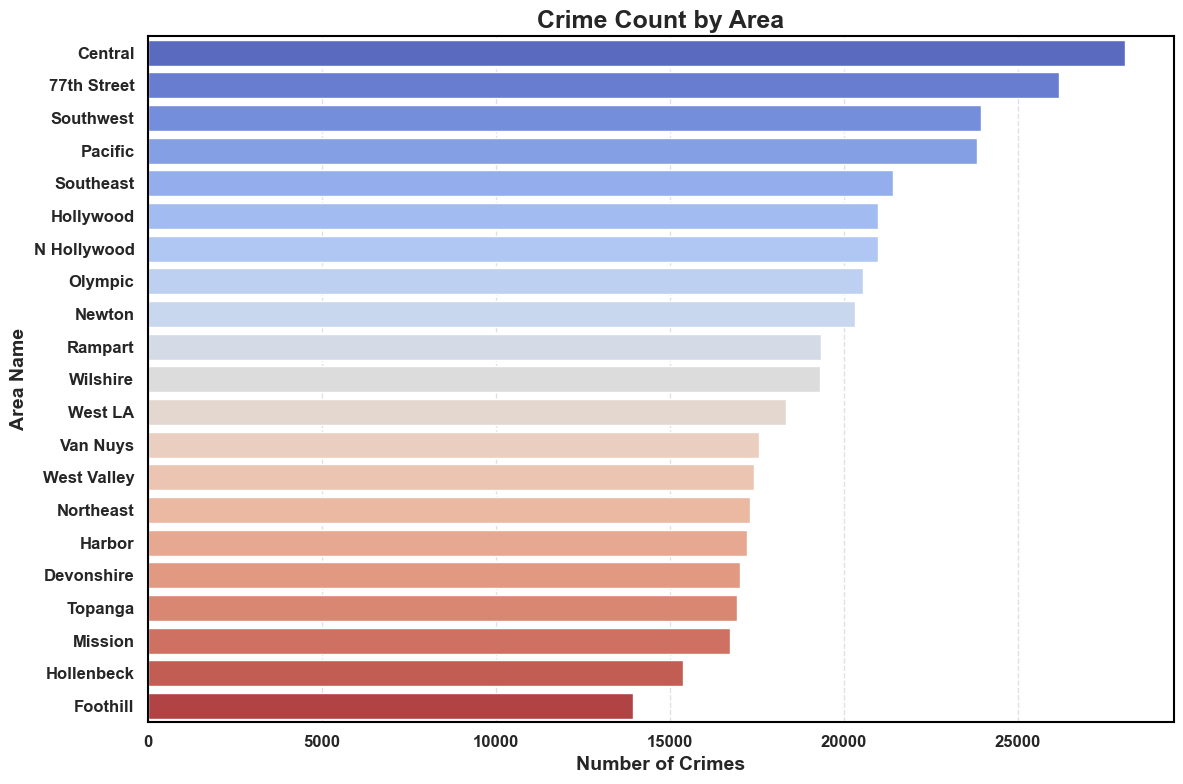

In [64]:
# A horizontal bar chart for visual clarity.
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the countplot
ax = sns.countplot(
    data=data,
    y='AREA NAME',
    order=data['AREA NAME'].value_counts().index,
    palette='coolwarm'
)

# Add title and make it bold
plt.title('Crime Count by Area', fontsize=18, weight='bold')

# Label axes with bold text
plt.xlabel('Number of Crimes', fontsize=14, weight='bold')
plt.ylabel('Area Name', fontsize=14, weight='bold')

# Make tick labels bold
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Add a border around the entire plot (top, bottom, left, right)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Add gridlines for better clarity
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# 2. Crimes Over the Years 📈

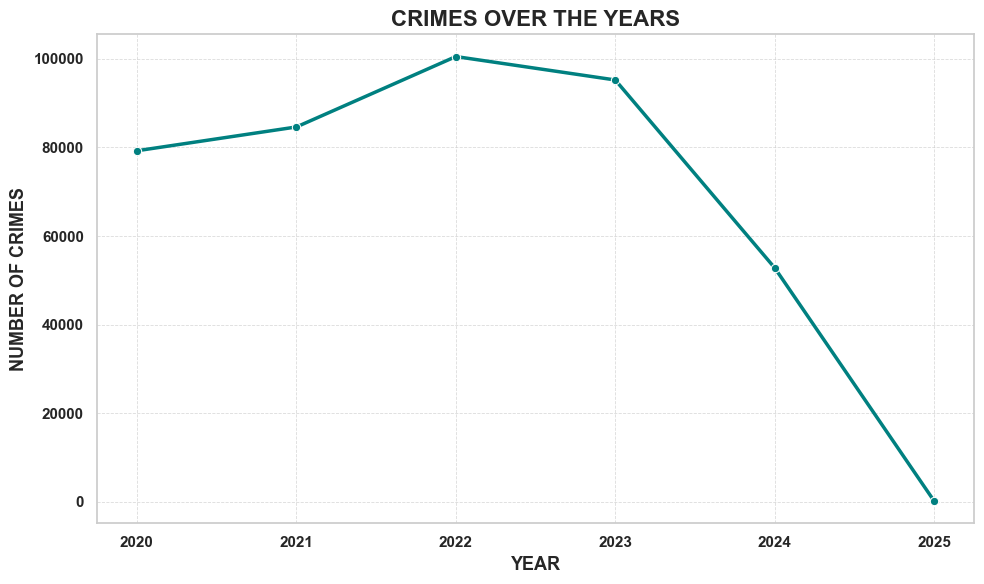

In [59]:
# Shows trend in crime over years using lineplot with visual effects.
plt.figure(figsize=(10, 6))
yearly_crimes = data['Year'].value_counts().sort_index()

# Line plot with markers and styling
sns.lineplot(
    x=yearly_crimes.index,
    y=yearly_crimes.values,
    marker='o',
    linewidth=2.5,
    color='teal'
)

# Bold title and labels
plt.title('CRIMES OVER THE YEARS', fontsize=16, weight='bold')
plt.xlabel('YEAR', fontsize=13, weight='bold')
plt.ylabel('NUMBER OF CRIMES', fontsize=13, weight='bold')

# Grid and border (spines) styling
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)

# Bold the ticks
plt.xticks(fontsize=11, weight='bold')
plt.yticks(fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

# 3. Crime Distribution by Day of the Week 📊

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2665461692.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




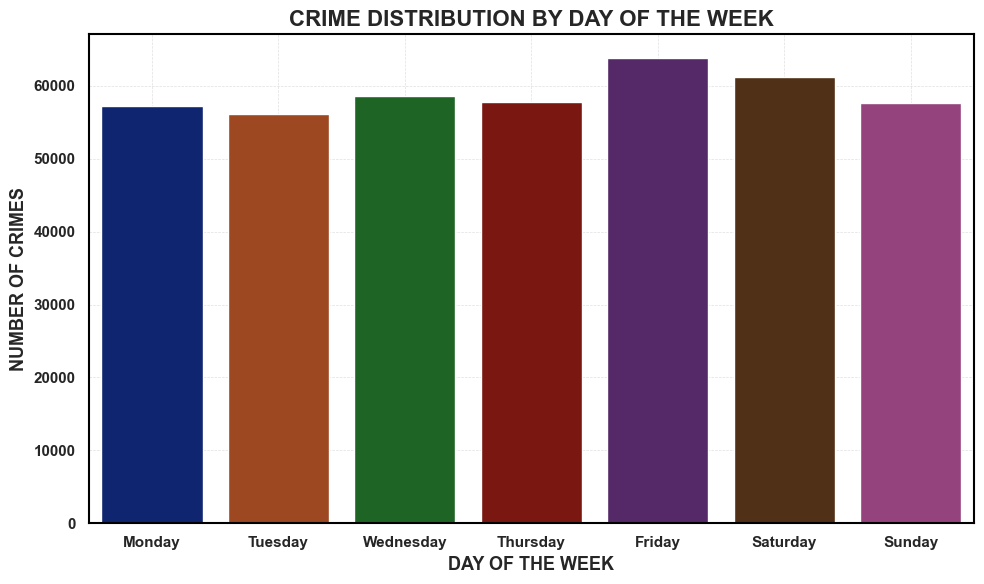

In [68]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the countplot with a dark palette
sns.countplot(
    data=data,
    x='DayOfWeek',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='dark'
)

# Set the title and axis labels with bold fonts
plt.title('CRIME DISTRIBUTION BY DAY OF THE WEEK', fontsize=16, weight='bold')
plt.xlabel('DAY OF THE WEEK', fontsize=13, weight='bold')
plt.ylabel('NUMBER OF CRIMES', fontsize=13, weight='bold')

# Add grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Make border (spines) visible and bold
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Bold tick labels
plt.xticks(fontsize=11, weight='bold')
plt.yticks(fontsize=11, weight='bold')

# Fit layout and show
plt.tight_layout()
plt.show()


# 4. Crime Description Frequency (Top 10) 🧮

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\3103137221.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


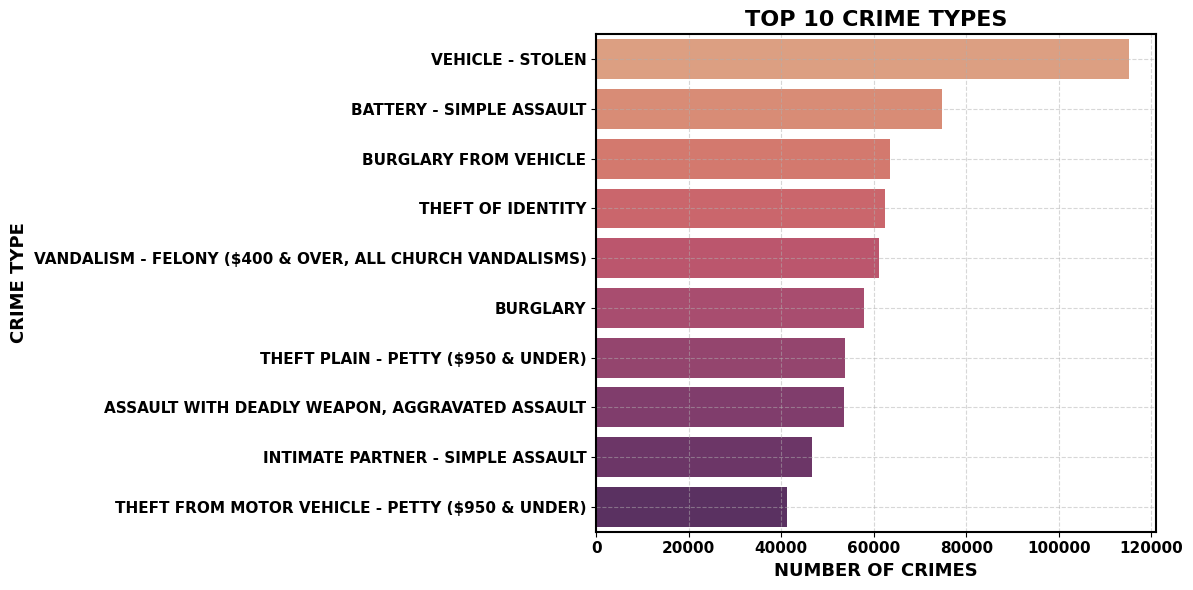

In [34]:

# Prepare data
top_crimes = data['Crime Description'].value_counts().nlargest(10)

# Create figure
plt.figure(figsize=(12, 6))

# Horizontal barplot using dark aesthetic palette
sns.barplot(
    y=top_crimes.index,
    x=top_crimes.values,
    palette='flare'
)

# Add title and axis labels with bold font
plt.title('TOP 10 CRIME TYPES', fontsize=16, weight='bold')
plt.xlabel('NUMBER OF CRIMES', fontsize=13, weight='bold')
plt.ylabel('CRIME TYPE', fontsize=13, weight='bold')

# Add grid for visual support
plt.grid(True, linestyle='--', alpha=0.5)

# Add border to plot
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Bold tick labels
plt.xticks(fontsize=11, weight='bold')
plt.yticks(fontsize=11, weight='bold')

# Layout adjustment
plt.tight_layout()
plt.show()


# 5. Heatmap of Crimes by Hour and Day 🧱

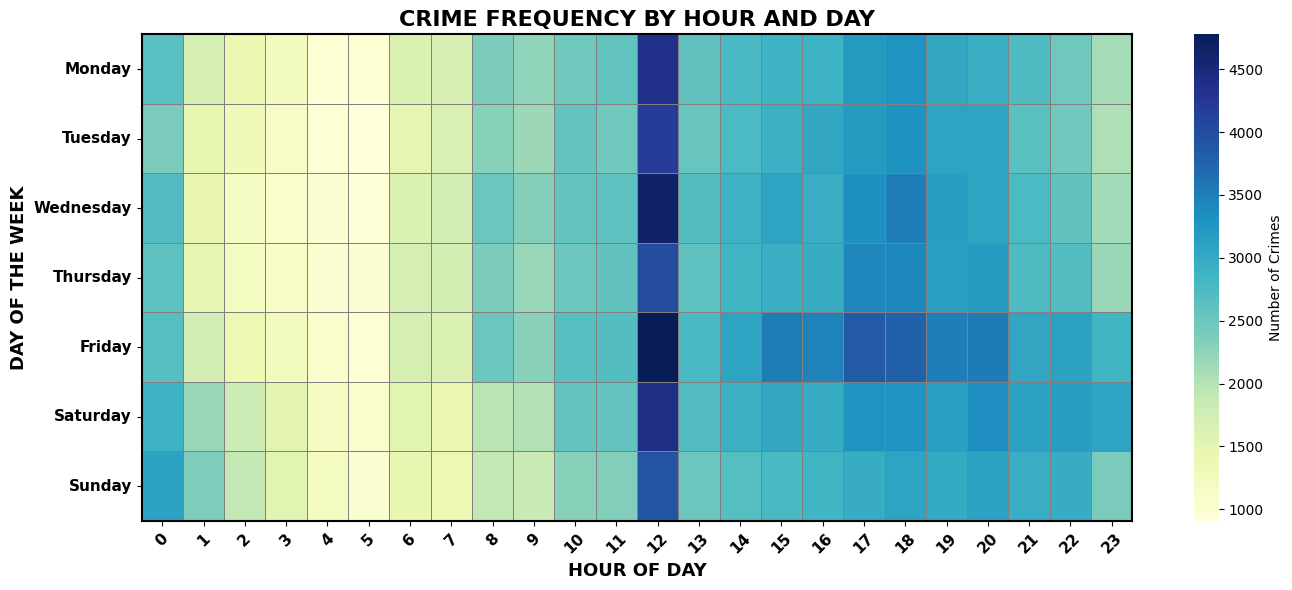

In [35]:
# Pivot table for heatmap data
heatmap_data = data.pivot_table(
    index='DayOfWeek', 
    columns='Hour', 
    values='Crime Description', 
    aggfunc='count'
)

# Order the days of the week properly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Create figure
plt.figure(figsize=(14, 6))

# Draw heatmap with borders between cells
sns.heatmap(
    heatmap_data, 
    cmap='YlGnBu', 
    linewidths=0.5, 
    linecolor='gray', 
    cbar_kws={'label': 'Number of Crimes'}
)

# Title and labels with bold font
plt.title('CRIME FREQUENCY BY HOUR AND DAY', fontsize=16, weight='bold')
plt.xlabel('HOUR OF DAY', fontsize=13, weight='bold')
plt.ylabel('DAY OF THE WEEK', fontsize=13, weight='bold')

# Tick label formatting
plt.xticks(fontsize=11, weight='bold', rotation=45)
plt.yticks(fontsize=11, weight='bold', rotation=0)

# Bordered outer plot
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Layout adjustment
plt.tight_layout()
plt.show()


# 6. Crime Frequency by Month 📉

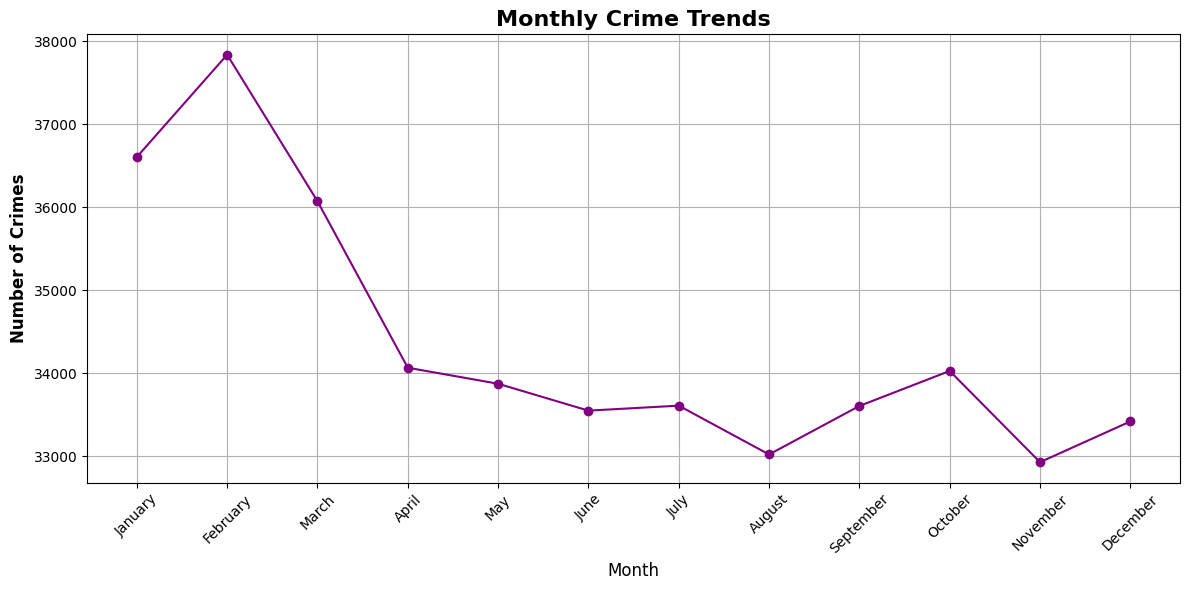

In [36]:
# Convert 'Month' from float to integer safely
data = data.copy()  # optional: to avoid SettingWithCopyWarning
data = data[data['Month'].notna()]  # drop rows with NaN in 'Month'
data['Month'] = data['Month'].astype(int)

# Map month number to month name
data['Month_Name'] = data['Month'].apply(lambda x: calendar.month_name[x])

# Define month order
month_order = list(calendar.month_name)[1:]  # ['January', ..., 'December']

# Count and reindex to preserve month order
month_crimes = data['Month_Name'].value_counts().reindex(month_order).fillna(0)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(month_crimes.index, month_crimes.values, marker='o', linestyle='-', color='purple')
plt.title('Monthly Crime Trends', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12, weight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 7. Crime Count by Area (Top 10) 🧮

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2247091128.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2247091128.py:35: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2247091128.py:35: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2247091128.py:35: UserWarning:

Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missin

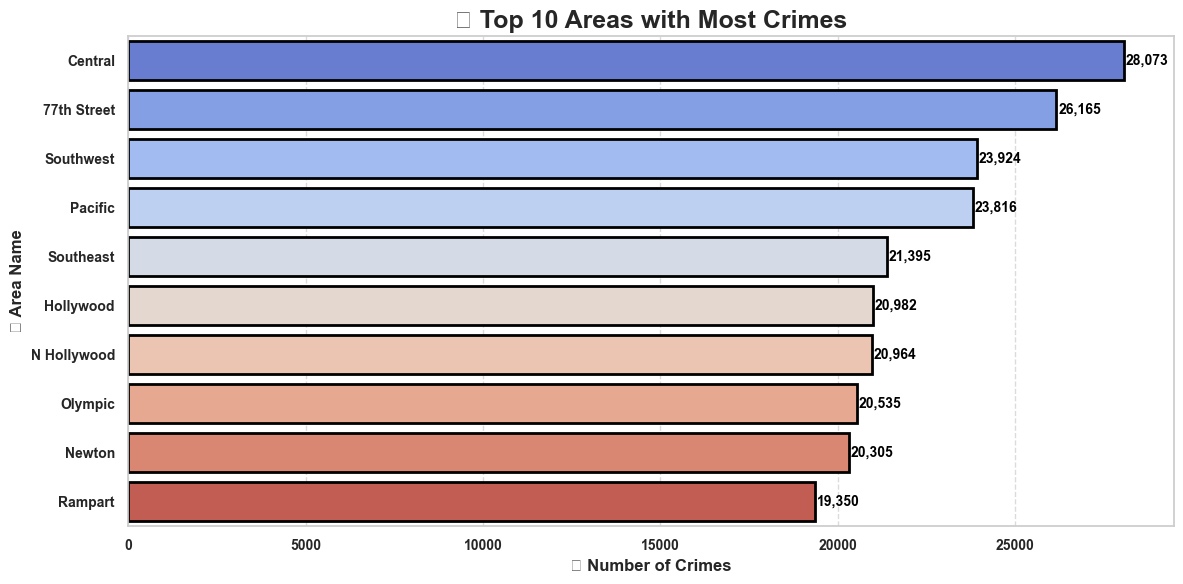

In [77]:
# Get top 10 crime-prone areas
top_areas = data['AREA NAME'].value_counts().head(10)

# Create the figure
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x=top_areas.values,
    y=top_areas.index,
    palette='coolwarm',
    edgecolor='black',  # Border around bars
    linewidth=2
)

# Add data labels to each bar
for bar in bars.patches:
    plt.text(bar.get_width() + 50,  # Slightly to the right of bar end
             bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width()):,}',
             va='center',
             fontsize=10,
             fontweight='bold',
             color='black')

# Customize axes and title
plt.title('🔴 Top 10 Areas with Most Crimes', fontsize=18, fontweight='bold')
plt.xlabel('📊 Number of Crimes', fontsize=12, fontweight='bold')
plt.ylabel('📍 Area Name', fontsize=12, fontweight='bold')

# Enhance ticks
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Add background grid and tight layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


# 8. Victim Gender Distribution 🍩

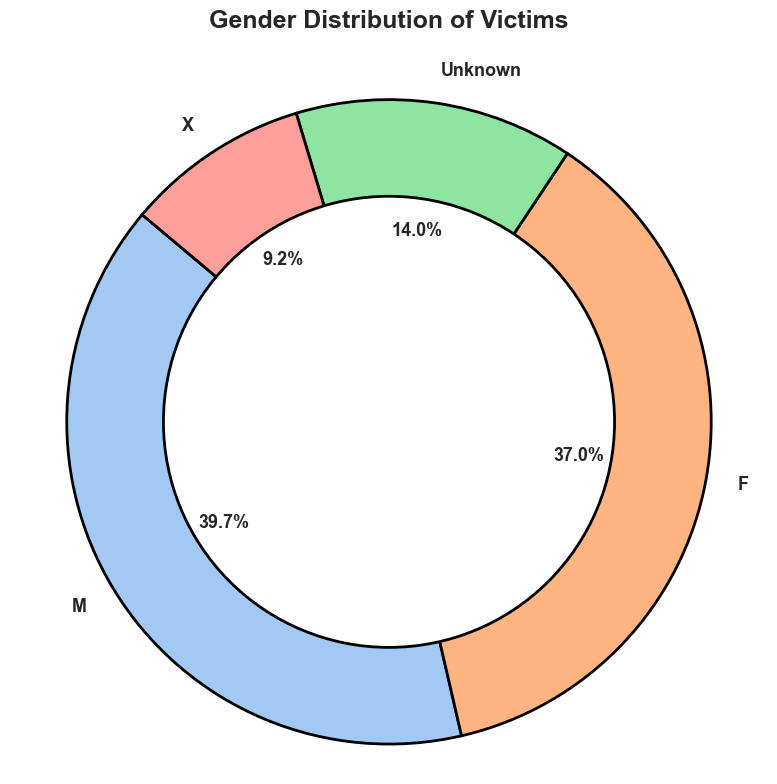

In [38]:

# Count victim genders
gender_counts = data['Vict Sex'].value_counts()

# Auto-generate distinct soft colors
colors = sns.color_palette("pastel", len(gender_counts))

# Set figure size
fig, ax = plt.subplots(figsize=(8, 8))

# Create pie chart with bold borders and text
wedges, texts, autotexts = ax.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 2},
    textprops={'fontsize': 13, 'weight': 'bold'}
)

# Add center circle to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white', edgecolor='black', linewidth=2)
ax.add_artist(centre_circle)

# Bold title with spacing
plt.title('Gender Distribution of Victims', fontsize=18, fontweight='bold', pad=30)

# Ensure it's a circle and layout is clean
ax.axis('equal')
plt.tight_layout()

# Show the plot
plt.show()


# 9. Weapon Usage in Crimes (Top 10) 📊

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2142174043.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2142174043.py:38: UserWarning:

Glyph 128481 (\N{DAGGER KNIFE}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2142174043.py:38: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128481 (\N{DAGGER KNIFE}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.



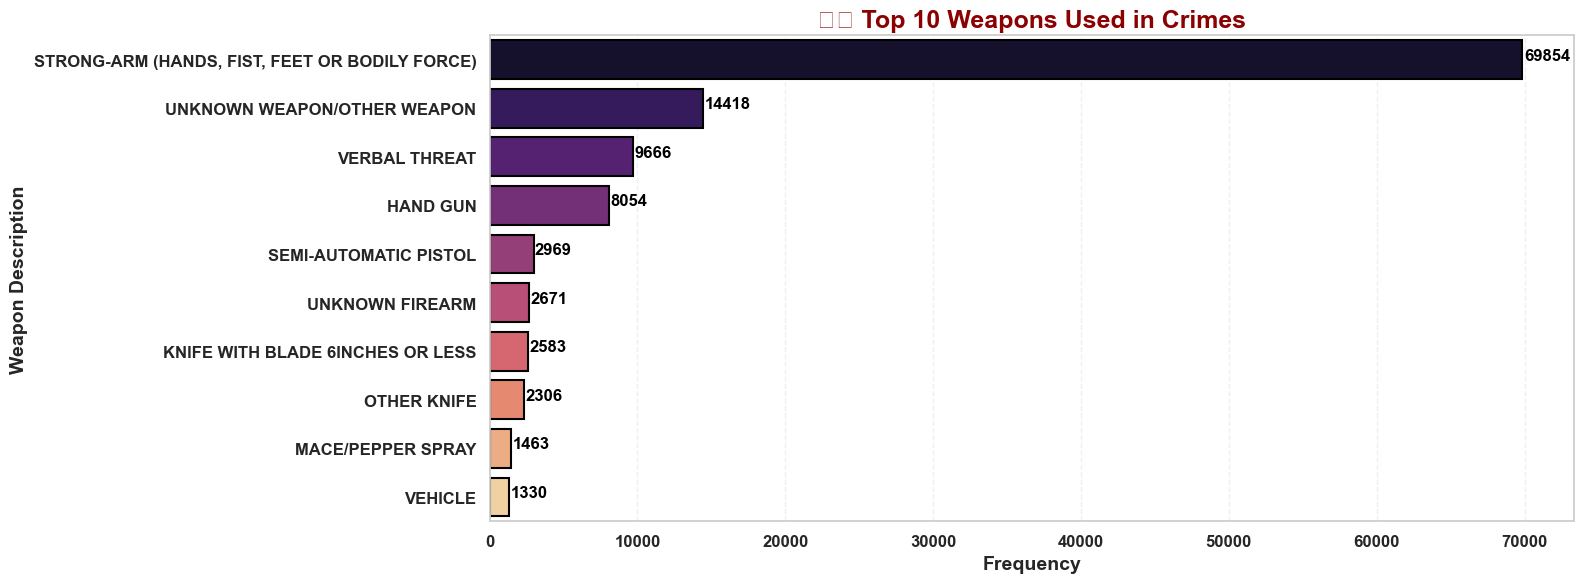

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 weapons
top_weapons = data['Weapon Desc'].value_counts().head(10)

# Set style and figure size
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')

# Create horizontal barplot
sns.barplot(
    y=top_weapons.index,
    x=top_weapons.values,
    palette='magma',
    edgecolor='black',         # Border around bars
    linewidth=1.5
)

# Title and labels with bold styling
plt.title('🗡️ Top 10 Weapons Used in Crimes', fontsize=18, fontweight='bold', color='darkred')
plt.xlabel('Frequency', fontsize=14, fontweight='bold')
plt.ylabel('Weapon Description', fontsize=14, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Add subtle gridlines
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels next to bars
for i, v in enumerate(top_weapons.values):
    plt.text(v + 100, i, str(v), color='black', fontsize=12, weight='bold')


# Tight layout
plt.tight_layout()

# Show plot
plt.show()


# 10. Correlation Matrix 🧱

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'Time'),
  Text(0, 1.5, 'Part 1-2'),
  Text(0, 2.5, 'Vict Age'),
  Text(0, 3.5, 'Primary Crime Code'),
  Text(0, 4.5, 'Latitude'),
  Text(0, 5.5, 'Longitude'),
  Text(0, 6.5, 'Total Offenses'),
  Text(0, 7.5, 'Hour'),
  Text(0, 8.5, 'Year'),
  Text(0, 9.5, 'Month')])

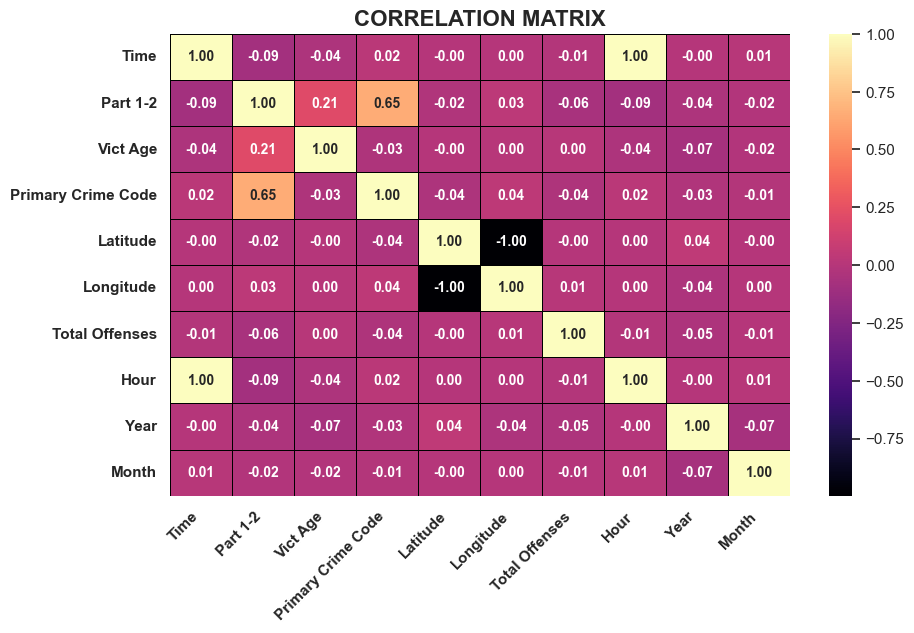

In [97]:
# Set figure size
plt.figure(figsize=(10, 6))

# Draw heatmap with annotations, bold font, and strong color contrast
sns.heatmap(
    data.corr(numeric_only=True), 
    annot=True, 
    cmap='magma', 
    fmt=".2f", 
    linewidths=0.5, 
    linecolor='black', 
    annot_kws={'size': 10,'weight': 'bold'}
)

# Add a bold title
plt.title('CORRELATION MATRIX', fontsize=16, weight='bold')

# Tick label styling
plt.xticks(rotation=45, ha='right', fontsize=11, weight='bold')
plt.yticks(rotation=0, fontsize=11, weight='bold')

# Add border around the entire plot


# 11. Boxplot for Outlier Detection in Victim Age 📊

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\1419310120.py:24: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.



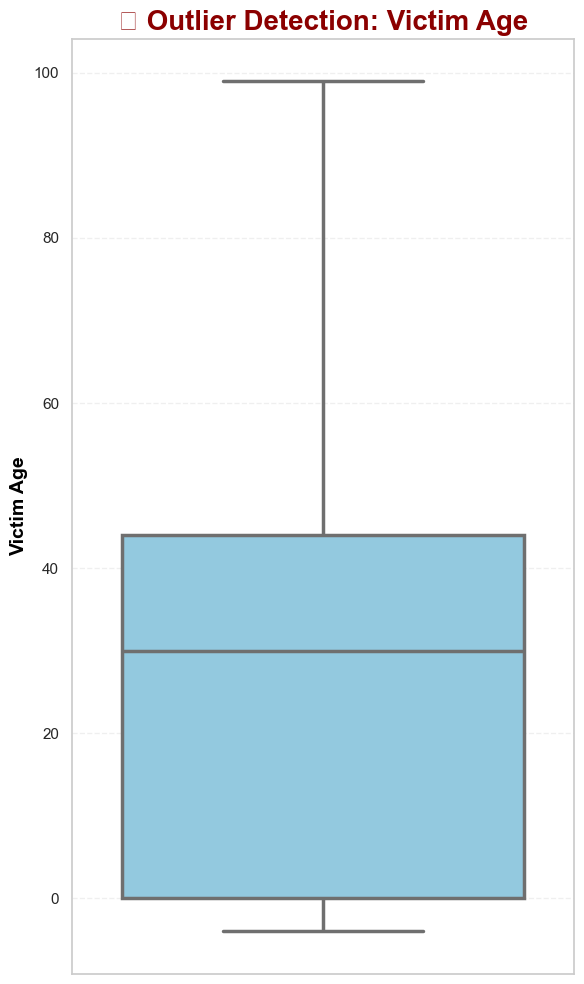

In [102]:
# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(6, 10))  # Taller for vertical orientation

# Vertical boxplot
sns.boxplot(
    data=data,
    y='Vict Age',                 # Vertical axis
    color='skyblue',
    linewidth=2.5,                # Border thickness
    fliersize=6,                  # Size of outliers
    flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', linestyle='none')  # Outlier style
)

# Title and label
plt.title('📌 Outlier Detection: Victim Age', fontsize=20, fontweight='bold', color='darkred')
plt.ylabel('Victim Age', fontsize=14, fontweight='bold', color='black')

# Grid & layout
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Show plot
plt.show()


# 12. Geospatial Visualization of the Top 1000 Reported Crimes🗺️

In [103]:
# Drop rows with missing coordinates
geo_data = data.dropna(subset=['Latitude', 'Longitude'])

# Filter top 1000 recent crimes for performance
geo_data = geo_data.sort_values(by='Date', ascending=False).head(1000)

# Center of the map
map_center = [geo_data['Latitude'].mean(), geo_data['Longitude'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=11, tiles='CartoDB dark_matter')

# Marker cluster
marker_cluster = MarkerCluster().add_to(crime_map)

# Stylish markers
for _, row in geo_data.iterrows():
    popup_html = f"""
    <div style="color: white; background-color: #2c2c2c; padding: 10px; border-radius: 8px; font-weight: bold;">
        🕵️ <b>{row['Crime Description']}</b><br>
        📍 Area: {row['AREA NAME']}<br>
        📅 Date: {row['Date']}
    </div>
    """
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='lime',
        fill=True,
        fill_color='lime',
        fill_opacity=0.85,
        popup=folium.Popup(popup_html, max_width=300)
    ).add_to(marker_cluster)

# Display map
crime_map


#                                                               DASHBOARD 🖼️

In [104]:

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output, State, callback
import dash_bootstrap_components as dbc
from datetime import datetime

# Initialize the Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define app layout with filters and visualization areas
app.layout = dbc.Container([
    html.H1("Crime Data Dashboard", className="text-center my-4"),
    
    # Filters Row
    dbc.Row([
        # Year Filter
        dbc.Col([
            html.Label("Select Year(s):"),
            dcc.Dropdown(
                id='year-filter',
                options=[{'label': str(int(year)), 'value': year} for year in sorted(data['Year'].unique())],
                value=sorted(data['Year'].unique()),
                multi=True
            ),
        ], width=3),
        
        # Area Filter
        dbc.Col([
            html.Label("Select Area(s):"),
            dcc.Dropdown(
                id='area-filter',
                options=[{'label': area, 'value': area} for area in sorted(data['AREA NAME'].unique())],
                value=sorted(data['AREA NAME'].unique())[:3],  # Default to first 3 areas
                multi=True
            ),
        ], width=3),
        
        # Crime Type Filter
        dbc.Col([
            html.Label("Select Crime Type(s):"),
            dcc.Dropdown(
                id='crime-filter',
                options=[{'label': crime, 'value': crime} for crime in sorted(data['Crime Description'].unique())],
                value=sorted(data['Crime Description'].unique())[:3],  # Default to first 3 crimes
                multi=True
            ),
        ], width=3),
        
        # Time of Day Filter
        dbc.Col([
            html.Label("Time of Day:"),
            dcc.RangeSlider(
                id='hour-filter',
                min=0,
                max=23,
                step=1,
                marks={i: f'{i}:00' if i % 6 == 0 else '' for i in range(0, 24)},
                value=[0, 23]
            ),
        ], width=3),
    ], className="mb-4"),
    
    # Additional Filters Row
    dbc.Row([
        # Victim Age Range
        dbc.Col([
            html.Label("Victim Age Range:"),
            dcc.RangeSlider(
                id='age-filter',
                min=0,
                max=100,
                step=1,
                marks={i: str(i) for i in range(int(data['Vict Age'].min()), int(data['Vict Age'].max()) + 1, 10)},
                value=[int(data['Vict Age'].min()), int(data['Vict Age'].max())]
            ),
        ], width=6),
        
        # Victim Sex Filter
        dbc.Col([
            html.Label("Victim Sex:"),
            dcc.Dropdown(
                id='sex-filter',
                options=[{'label': sex if sex != 'X' else 'Other', 'value': sex} for sex in sorted(data['Vict Sex'].unique())],
                value=sorted(data['Vict Sex'].unique()),
                multi=True
            ),
        ], width=3),
        
        # Day of Week Filter
        dbc.Col([
            html.Label("Day of Week:"),
            dcc.Dropdown(
                id='day-filter',
                options=[
                    {'label': day, 'value': day} for day in 
                    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                ],
                value=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                multi=True
            ),
        ], width=3),
    ], className="mb-4"),
    
    # Key Metrics Row
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4("Total Incidents", className="card-title text-center"),
                    html.H2(id="total-incidents", className="card-text text-center")
                ])
            ]),
        ], width=4),
        
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4("Most Common Crime", className="card-title text-center"),
                    html.H2(id="common-crime", className="card-text text-center")
                ])
            ]),
        ], width=4),
        
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H4("Average Victim Age", className="card-title text-center"),
                    html.H2(id="avg-age", className="card-text text-center")
                ])
            ]),
        ], width=4),
    ], className="mb-4"),
    
    # Charts Row 1
    dbc.Row([
        # Time Series Chart
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Crime Incidents Over Time"),
                dbc.CardBody([
                    dcc.Graph(id="time-series-chart")
                ])
            ]),
        ], width=8),
        
        # Crime Type Distribution
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Crime Type Distribution"),
                dbc.CardBody([
                    dcc.Graph(id="crime-pie-chart")
                ])
            ]),
        ], width=4),
    ], className="mb-4"),
    
    # Charts Row 2
    dbc.Row([
        # Area Comparison
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Crime by Area"),
                dbc.CardBody([
                    dcc.Graph(id="area-bar-chart")
                ])
            ]),
        ], width=6),
        
        # Hour of Day Distribution
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Crime by Hour of Day"),
                dbc.CardBody([
                    dcc.Graph(id="hour-bar-chart")
                ])
            ]),
        ], width=6),
    ], className="mb-4"),
    
    # Map and Heat Calendar Row
    dbc.Row([
        # Map View
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Crime Locations"),
                dbc.CardBody([
                    dcc.Graph(id="map-view")
                ])
            ]),
        ], width=6),
        
        # Day of Week / Hour Heatmap
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Crime Heatmap: Day of Week vs Hour"),
                dbc.CardBody([
                    dcc.Graph(id="day-hour-heatmap")
                ])
            ]),
        ], width=6),
    ], className="mb-4"),
    
], fluid=True)

# Define callback to update all visualizations based on filters
@app.callback(
    [
        Output("total-incidents", "children"),
        Output("common-crime", "children"),
        Output("avg-age", "children"),
        Output("time-series-chart", "figure"),
        Output("crime-pie-chart", "figure"),
        Output("area-bar-chart", "figure"),
        Output("hour-bar-chart", "figure"),
        Output("map-view", "figure"),
        Output("day-hour-heatmap", "figure")
    ],
    [
        Input("year-filter", "value"),
        Input("area-filter", "value"),
        Input("crime-filter", "value"),
        Input("hour-filter", "value"),
        Input("age-filter", "value"),
        Input("sex-filter", "value"),
        Input("day-filter", "value")
    ]
)
def update_dashboard(years, areas, crimes, hours, ages, sexes, days):
    # Apply filters to data
    filtered_data = data.copy()
    
    # Filter by years
    if years:
        filtered_data = filtered_data[filtered_data['Year'].isin(years)]
    
    # Filter by areas
    if areas:
        filtered_data = filtered_data[filtered_data['AREA NAME'].isin(areas)]
    
    # Filter by crime types
    if crimes:
        filtered_data = filtered_data[filtered_data['Crime Description'].isin(crimes)]
    
    # Filter by hour range
    if hours:
        filtered_data = filtered_data[
            (filtered_data['Hour'] >= hours[0]) & 
            (filtered_data['Hour'] <= hours[1])
        ]
    
    # Filter by age range
    if ages:
        filtered_data = filtered_data[
            (filtered_data['Vict Age'] >= ages[0]) & 
            (filtered_data['Vict Age'] <= ages[1])
        ]
    
    # Filter by victim sex
    if sexes:
        filtered_data = filtered_data[filtered_data['Vict Sex'].isin(sexes)]
    
    # Filter by day of week
    if days:
        filtered_data = filtered_data[filtered_data['DayOfWeek'].isin(days)]
    
    # If no data after filtering
    if filtered_data.empty:
        empty_fig = go.Figure()
        empty_fig.update_layout(
            title="No data matches the selected filters",
            xaxis={"visible": False},
            yaxis={"visible": False}
        )
        
        return (
            "0",
            "N/A",
            "N/A",
            empty_fig,
            empty_fig,
            empty_fig,
            empty_fig,
            empty_fig,
            empty_fig
        )
    
    # Calculate metrics
    total_incidents = len(filtered_data)
    most_common_crime = filtered_data['Crime Description'].value_counts().idxmax()
    avg_victim_age = round(filtered_data['Vict Age'].mean(), 1)
    
    # Create time series chart (monthly aggregation)
    filtered_data['YearMonth'] = filtered_data['Date'].dt.to_period('M').astype(str)
    time_series_df = filtered_data.groupby(['YearMonth', 'Crime Description']).size().reset_index(name='Count')
    time_series_fig = px.line(
        time_series_df, 
        x='YearMonth', 
        y='Count', 
        color='Crime Description',
        title='Crime Incidents Over Time',
        labels={'YearMonth': 'Month', 'Count': 'Number of Incidents'}
    )
    time_series_fig.update_layout(
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        xaxis={'type': 'category'}
    )
    
    # Create crime type pie chart
    crime_dist = filtered_data['Crime Description'].value_counts().reset_index()
    crime_dist.columns = ['Crime Description', 'Count']
    pie_fig = px.pie(
        crime_dist, 
        values='Count', 
        names='Crime Description',
        title='Crime Type Distribution'
    )
    pie_fig.update_traces(textposition='inside', textinfo='percent+label')
    
    # Create area bar chart
    area_counts = filtered_data['AREA NAME'].value_counts().reset_index()
    area_counts.columns = ['AREA NAME', 'Count']
    area_fig = px.bar(
        area_counts, 
        x='AREA NAME', 
        y='Count',
        title='Crime Incidents by Area',
        labels={'AREA NAME': 'Area', 'Count': 'Number of Incidents'}
    )
    area_fig.update_layout(xaxis={'categoryorder':'total descending'})
    
    # Create hour of day bar chart
    hour_counts = filtered_data['Hour'].value_counts().reset_index()
    hour_counts.columns = ['Hour', 'Count']
    hour_counts = hour_counts.sort_values('Hour')
    hour_fig = px.bar(
        hour_counts, 
        x='Hour', 
        y='Count',
        title='Crime Incidents by Hour of Day',
        labels={'Hour': 'Hour of Day (24hr)', 'Count': 'Number of Incidents'}
    )
    
    # Create map view
    map_sample = filtered_data.sample(min(1000, len(filtered_data)))  # Sample for performance
    map_fig = px.scatter_mapbox(
        map_sample, 
        lat="Latitude", 
        lon="Longitude", 
        color="Crime Description",
        hover_name="Crime Description",
        hover_data=["AREA NAME", "Vict Age", "Vict Sex"],
        zoom=10,
        height=500
    )
    map_fig.update_layout(mapbox_style="open-street-map")
    map_fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    
    # Create day of week vs hour heatmap
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # Create pivot table for heatmap
    heatmap_data = filtered_data.groupby(['DayOfWeek', 'Hour']).size().reset_index(name='Count')
    heatmap_pivot = pd.pivot_table(
        heatmap_data, 
        values='Count', 
        index='DayOfWeek', 
        columns='Hour', 
        aggfunc='sum',
        fill_value=0
    )
    
    # Reorder days properly
    heatmap_pivot = heatmap_pivot.reindex(day_order)
    
    # Create heatmap
    heatmap_fig = px.imshow(
    heatmap_pivot,
    labels=dict(x="Hour of Day", y="Day of Week", color="Incident Count"),
    x=heatmap_pivot.columns.tolist(),  # Use actual hour columns
    y=heatmap_pivot.index.tolist(),    # Use actual day rows
    aspect="auto",
    title="Crime Incidents by Day and Hour"
)
    
    return (
        f"{total_incidents:,}",
        most_common_crime,
        str(avg_victim_age),
        time_series_fig,
        pie_fig,
        area_fig,
        hour_fig,
        map_fig,
        heatmap_fig
    )

# Run the app
if __name__ == '__main__':
    app.run(debug=True, port=8060)

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2418623763.py:347: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2418623763.py:347: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2418623763.py:347: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2418623763.py:347: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\hp\AppData\Local\Temp\ipykernel_25624\2418623763.py:347: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https:/

#                                                           THANK YOU 🙏